In [1]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("bank-full.csv.", sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.rename(columns={'y':'deposit'}, inplace=True)

In [6]:
numerical_col = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
def RemoveOutlier(numerical_col):
    for col in numerical_col:
        iqr = df[col].quantile(0.75)-df[col].quantile(0.25)
        lower_threshold = df[col].quantile(0.25)-(iqr*1.5)
        upper_threshold = df[col].quantile(0.75)+(iqr*1.5)
        print(f"Rentang nilai outlier pada fitur {col} : <{round(lower_threshold,2)} atau >{round(upper_threshold,2)}")
        df.loc[(df[col]<=lower_threshold),col] = lower_threshold
        df.loc[(df[col]>=upper_threshold),col] = upper_threshold
    

In [7]:
RemoveOutlier(numerical_col)

Rentang nilai outlier pada fitur age : <10.5 atau >70.5
Rentang nilai outlier pada fitur balance : <-1962.0 atau >3462.0
Rentang nilai outlier pada fitur day : <-11.5 atau >40.5
Rentang nilai outlier pada fitur duration : <-221.0 atau >643.0
Rentang nilai outlier pada fitur campaign : <-2.0 atau >6.0
Rentang nilai outlier pada fitur pdays : <-1.0 atau >-1.0
Rentang nilai outlier pada fitur previous : <0.0 atau >0.0


In [8]:
#encoding
label_encoder = LabelEncoder()
df['deposit'] = label_encoder.fit_transform(df['deposit'])
df['job'] = label_encoder.fit_transform(df['job'])
df['marital'] = label_encoder.fit_transform(df['marital'])
df['education'] = label_encoder.fit_transform(df['education'])
df['default'] = label_encoder.fit_transform(df['default'])
df['housing'] = label_encoder.fit_transform(df['housing'])
df['loan'] = label_encoder.fit_transform(df['loan'])
df['contact'] = label_encoder.fit_transform(df['contact'])
df['month'] = label_encoder.fit_transform(df['month'])
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58.0,4,1,2,0,2143,1,0,2,5.0,8,261,1,-1,0,3,0
1,44.0,9,2,1,0,29,1,0,2,5.0,8,151,1,-1,0,3,0
2,33.0,2,1,1,0,2,1,1,2,5.0,8,76,1,-1,0,3,0
3,47.0,1,1,3,0,1506,1,0,2,5.0,8,92,1,-1,0,3,0
4,33.0,11,2,3,0,1,0,0,2,5.0,8,198,1,-1,0,3,0


In [9]:
#modelling
X = df.drop('deposit', axis=1)
y = df['deposit']

In [10]:
#Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  int32  
 2   marital    45211 non-null  int32  
 3   education  45211 non-null  int32  
 4   default    45211 non-null  int32  
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  int32  
 7   loan       45211 non-null  int32  
 8   contact    45211 non-null  int32  
 9   day        45211 non-null  float64
 10  month      45211 non-null  int32  
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  int32  
 16  deposit    45211 non-null  int32  
dtypes: float64(2), int32(10), int64(5)
memory usage: 4.1 MB


In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40689, 16)
(40689,)
(4522, 16)
(4522,)


In [13]:
'''#Scalling
scaler = StandardScaler()
scaler.fit(X_train)

# Transformasi X
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)'''

'#Scalling\nscaler = StandardScaler()\nscaler.fit(X_train)\n\n# Transformasi X\nX_train_scaled = scaler.transform(X_train)\nX_test_scaled = scaler.transform(X_test)'

In [14]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train_scaled = min_max_scaler.transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [15]:
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": LinearSVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Naive Bayes": GaussianNB()
}

no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.process_time()
        classifier.fit(X_train, y_train)
        t_end = time.process_time()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [16]:
df_training = batch_classify(X_train_scaled, y_train)

trained Logistic Regression in 0.03 s
trained Nearest Neighbors in 0.00 s
trained Linear SVM in 0.17 s
trained Decision Tree in 0.12 s
trained Random Forest in 0.39 s
trained Naive Bayes in 0.00 s


In [17]:
print(df_training.sort_values(by='train_score', ascending=False))

            classifier  train_score  training_time
3        Decision Tree     1.000000       0.125000
4        Random Forest     0.996805       0.390625
1    Nearest Neighbors     0.918750       0.000000
0  Logistic Regression     0.886898       0.031250
2           Linear SVM     0.886603       0.171875
5          Naive Bayes     0.869080       0.000000


In [18]:
def batch_pred(X_test, y_test):
    for key, classifier in dict_classifiers.items():
        y_pred = classifier.predict(X_test)
        
        matrix = confusion_matrix(y_test, y_pred)
        
        f, ax = plt.subplots(figsize=(12, 8))
        sns.heatmap(matrix, annot =True, fmt = "d", linewidths = 0.5, ax=ax)
        plt.title(f"Confusion Matrix{key}", fontsize=20)
        plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
        ax.set_yticks(np.arange(matrix.shape[0]) + 0.5, minor=False)
        ax.set_xticklabels(['True', 'False'], fontsize=16, rotation=360)
        ax.set_yticklabels(['True', 'False'], fontsize=16, rotation=360)
        plt.show()
        tn, fp, fn, tp = matrix.ravel()
        print(f'TN: {tn}')
        print(f'FP: {fp}')
        print(f'FN: {fn}')
        print(f'TP: {tp}')      
        print(classification_report(y_test, y_pred))      

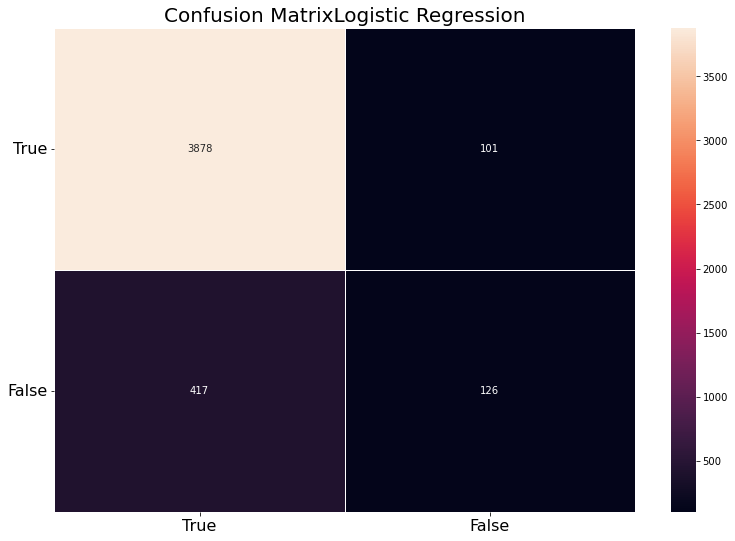

TN: 3878
FP: 101
FN: 417
TP: 126
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      3979
           1       0.56      0.23      0.33       543

    accuracy                           0.89      4522
   macro avg       0.73      0.60      0.63      4522
weighted avg       0.86      0.89      0.86      4522



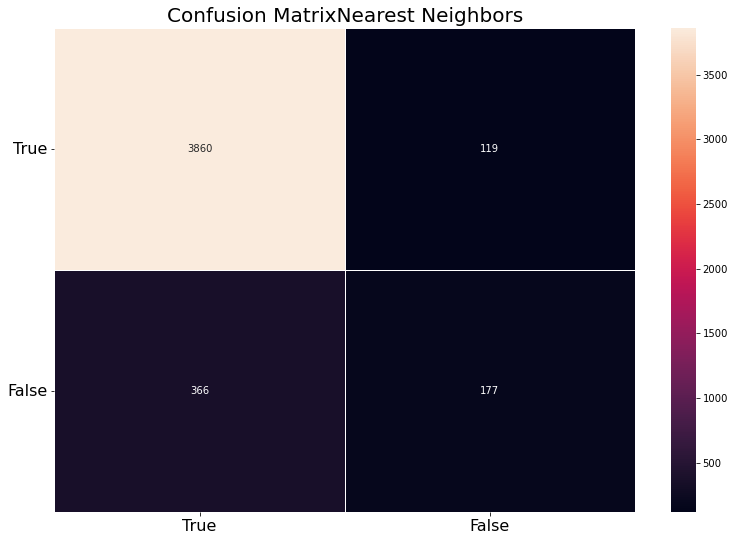

TN: 3860
FP: 119
FN: 366
TP: 177
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3979
           1       0.60      0.33      0.42       543

    accuracy                           0.89      4522
   macro avg       0.76      0.65      0.68      4522
weighted avg       0.88      0.89      0.88      4522



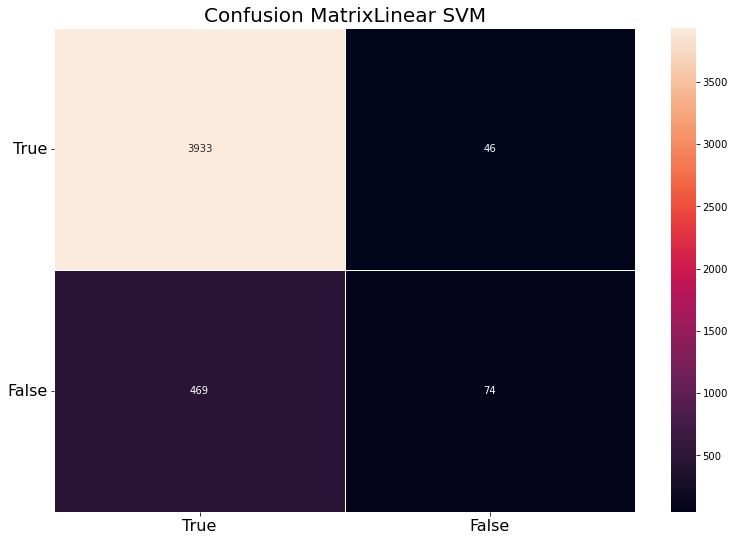

TN: 3933
FP: 46
FN: 469
TP: 74
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      3979
           1       0.62      0.14      0.22       543

    accuracy                           0.89      4522
   macro avg       0.76      0.56      0.58      4522
weighted avg       0.86      0.89      0.85      4522



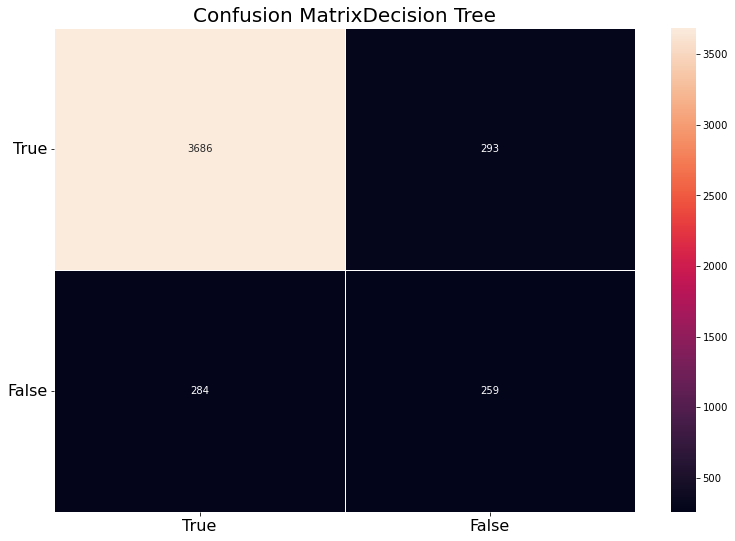

TN: 3686
FP: 293
FN: 284
TP: 259
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3979
           1       0.47      0.48      0.47       543

    accuracy                           0.87      4522
   macro avg       0.70      0.70      0.70      4522
weighted avg       0.87      0.87      0.87      4522



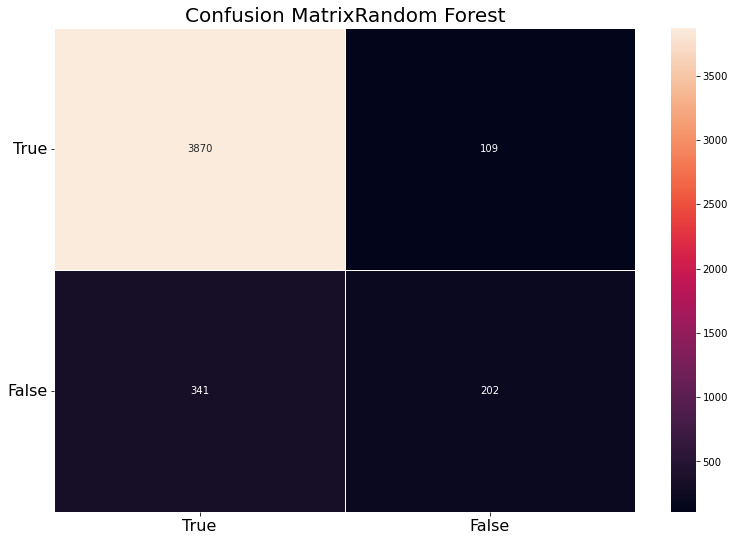

TN: 3870
FP: 109
FN: 341
TP: 202
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3979
           1       0.65      0.37      0.47       543

    accuracy                           0.90      4522
   macro avg       0.78      0.67      0.71      4522
weighted avg       0.89      0.90      0.89      4522



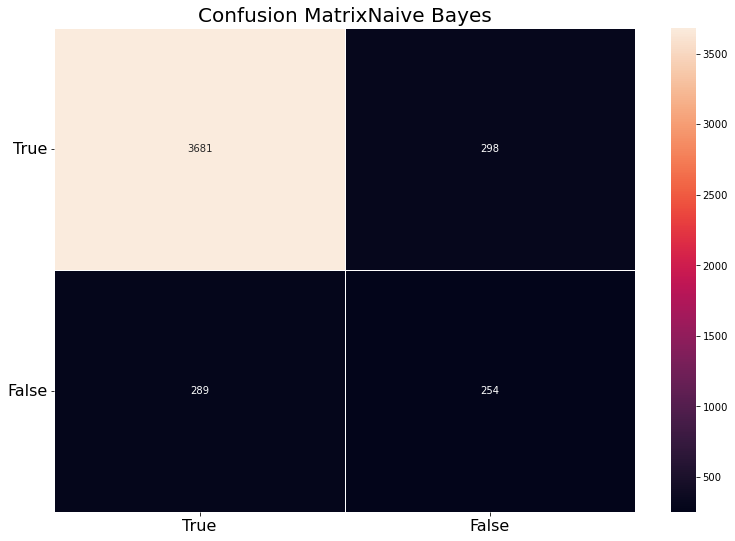

TN: 3681
FP: 298
FN: 289
TP: 254
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3979
           1       0.46      0.47      0.46       543

    accuracy                           0.87      4522
   macro avg       0.69      0.70      0.70      4522
weighted avg       0.87      0.87      0.87      4522



In [19]:
batch_pred(X_test_scaled, y_test)

In [20]:
def batch_crossval(X_train, y_train,):
    df_result = pd.DataFrame(data=np.zeros(shape=(no_classifiers,2)), columns = ['classifier', 'cross_mean_scores'])
    count = 0
    for key, classifier in dict_classifiers.items():
        crossval = cross_val_score(classifier, X_train, y_train, cv=5)
        crossval_mean = crossval.mean()
        df_result.loc[count, 'classifier'] = key
        df_result.loc[count, 'cross_mean_scores'] = crossval_mean
        count +=1
    return df_result    

In [21]:
df_training_crossval = batch_crossval(X_train_scaled, y_train)

In [22]:
df_training_crossval = df_training_crossval.sort_values(by=['cross_mean_scores'], ascending=False)
df_training_crossval

,classifier,cross_mean_scores
4,Random Forest,0.899531
1,Nearest Neighbors,0.887955
0,Logistic Regression,0.886603
2,Linear SVM,0.886530
3,Decision Tree,0.871784
5,Naive Bayes,0.869400
